In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
%matplotlib notebook

In [3]:
#data = np.load('/Users/Frances/Documents/seas-fellowship/rvr/data/runp1_2/run_p1_2.npz')
#data = np.load('/Users/Frances/Documents/seas-fellowship/rvr/data/runp1_2/run_p1_2_042219.npz')
#data = np.load('/Users/Frances/Documents/seas-fellowship/rvr/data/runagree/run_agree_p1_2_042019.npz')
#data = np.load('/Users/Frances/Documents/seas-fellowship/rvr/data/runagree/run_agree_interact_042919_prod_thresh.npz')

#data = np.load('/Users/Frances/Documents/seas-fellowship/rvr/data/runagree/run_agree_interact_042919_thresh.npz')

#data = np.load('/Users/Frances/Documents/seas-fellowship/rvr/data/runorfunc/run_orfunc_051419.npz')

#data = np.load('/Users/Frances/Documents/seas-fellowship/rvr/data/runagree/run_agree_interact_051019_prod.npz')

data = np.load('/Users/Frances/Documents/seas-fellowship/rvr/data/bcesets/bcesets.npz')






In [4]:
x_train = data['x_train'][data['train_inds']]
y_train = data['y_train'][data['train_inds']]

x_valid = data['x_train'][data['valid_inds']]
y_valid = data['y_train'][data['valid_inds']]

x_test = data['x_test']
y_test = data['y_test']

yidx = 0

In [5]:
x_train.shape

(12000, 356)

In [6]:
print(data['x_train'].shape)
print(data['valid_inds'].shape)

(15000, 356)
(3000,)


In [7]:
modelall = LogisticRegression()
modelall.fit(x_train, y_train[:, yidx])
#modelall.fit(x_test, y_test[:, yidx])

/Users/Frances/anaconda3/envs/rvr-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [8]:
print(1 - modelall.score(x_train, y_train[:,yidx]))
print(1 - modelall.score(x_valid, y_valid[:,yidx]))
print(1 - modelall.score(x_test, y_test[:,yidx]))

0.0
0.0
0.6884


# Decision Trees

In [9]:
from sklearn import tree

In [28]:
dt = tree.DecisionTreeClassifier(random_state=3, max_features=int(np.sqrt(356)))

In [29]:
dt.fit(x_train, y_train[:, yidx])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=18, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=3,
            splitter='best')

In [30]:
print(1 - dt.score(x_train, y_train[:,yidx]))
print(1 - dt.score(x_valid, y_valid[:,yidx]))
print(1 - dt.score(x_test, y_test[:,yidx]))

0.0
0.0
0.5554


In [32]:
for i in range(25, 50):
    dt = tree.DecisionTreeClassifier(random_state=i, max_features=int(np.sqrt(356)))
    dt.fit(x_train, y_train[:, yidx])
    print(i,':', 1 - dt.score(x_test, y_test[:,yidx]))

25 : 0.18059999999999998
26 : 0.19640000000000002
27 : 0.5202
28 : 0.14380000000000004
29 : 0.47119999999999995
30 : 0.46540000000000004
31 : 0.736
32 : 0.44299999999999995
33 : 0.31000000000000005
34 : 0.40780000000000005
35 : 0.2872
36 : 0.3548
37 : 0.495
38 : 0.14539999999999997
39 : 0.21299999999999997
40 : 0.18799999999999994
41 : 0.19740000000000002
42 : 0.3106
43 : 0.32699999999999996
44 : 0.1562
45 : 0.31320000000000003
46 : 0.1906
47 : 0.39859999999999995
48 : 0.3812
49 : 0.14739999999999998


# Random Forest Classifier

In [49]:
rf = RandomForestClassifier(n_estimators=100, min_samples_split=2, random_state=1)

In [50]:
rf.fit(x_train, y_train[:, yidx])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [51]:
print(1 - rf.score(x_train, y_train[:,yidx]))
print(1 - rf.score(x_valid, y_valid[:,yidx]))
print(1 - rf.score(x_test, y_test[:,yidx]))

0.0
0.0
0.12039999999999995


In [52]:
rf.feature_importances_

array([2.43871803e-03, 1.23832136e-03, 1.33893876e-03, 8.53687051e-04,
       9.16849221e-04, 2.49761250e-03, 2.47480297e-03, 1.82222900e-03,
       2.14780986e-03, 2.19202090e-03, 2.52915325e-03, 1.23651913e-03,
       1.44577324e-03, 1.74700855e-03, 1.97198524e-03, 2.19100381e-03,
       1.52522293e-03, 2.94555782e-03, 6.04772722e-03, 8.54684096e-04,
       1.99917416e-03, 2.31209826e-03, 2.58354896e-03, 1.62232237e-03,
       7.09306501e-04, 6.28141269e-03, 4.11832392e-03, 2.47421781e-03,
       1.30434502e-03, 1.83601755e-03, 2.10593910e-03, 1.87478132e-03,
       1.34660719e-03, 1.87123354e-03, 2.70569307e-03, 1.06963105e-03,
       3.44769394e-03, 7.71157181e-04, 6.44971138e-04, 2.75031314e-03,
       2.72655010e-03, 5.13490351e-03, 2.20737963e-03, 5.00751335e-03,
       1.73182693e-03, 2.82786012e-03, 1.84594919e-03, 2.84683252e-03,
       3.80632117e-03, 2.08255634e-03, 9.42680148e-04, 2.53493399e-03,
       9.83715180e-04, 1.16942477e-03, 1.90028678e-03, 8.81478239e-04,
      

In [48]:
rf.feature_importances_

array([1.61884757e-03, 0.00000000e+00, 0.00000000e+00, 2.78970142e-03,
       7.03121005e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.68334759e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.73935330e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.08093504e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       9.34981805e-03, 9.23809741e-03, 0.00000000e+00, 8.07824546e-03,
       0.00000000e+00, 0.00000000e+00, 3.32539403e-02, 5.97230169e-03,
      

In [ ]:
fig = plt.figure(figsize=(150, 300))
plt.xticks(range(30))
plt.imshow(rf.feature_importances_[np.newaxis, :], cmap='plasma')


Indices of common features:
array([ 3, 29, 11, 26, 25, 28, 24,  7])


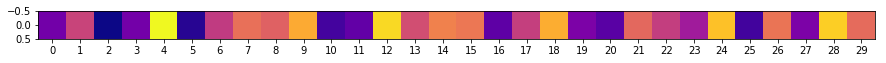

In [140]:
import pprint
pp = pprint.PrettyPrinter()
print('Indices of common features:')
pp.pprint(data['c_idx'])

avg_beta = np.mean(data['beta_vec_list'], axis=0)
fig = plt.figure(figsize=(15, 30))
plt.xticks(range(30))
plt.imshow(avg_beta[np.newaxis, :], cmap='plasma')


## Grid Search for Random Forest

In [152]:
param_grid = {
    'n_estimators': [100, 250, 500],
    'min_samples_split': [2, 4],
    'min_samples_leaf' : [1, 2, 5],
    'oob_score' : [True, False]
}

In [153]:
gs = GridSearchCV(rf, param_grid, n_jobs = 1, cv=5)

In [154]:
gs.fit(x_train, y_train[:,yidx])

KeyboardInterrupt: 

In [ ]:
gs.cv_results_

In [57]:
gs.best_params_

{'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000}

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [ ]:
print(1 - gs.best_estimator_.score(x_train, y_train[:,yidx]))
print(1 - gs.best_estimator_.score(x_valid, y_valid[:,yidx]))
print(1 - gs.best_estimator_.score(x_test, y_test[:,yidx]))

## Extra Random Forests

In [102]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier(n_estimators=500, max_features=12)

In [103]:
etc.fit(x_train, y_train[:, yidx])

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features=12, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [104]:
print(1 - etc.score(x_train, y_train[:,yidx]))
print(1 - etc.score(x_valid, y_valid[:,yidx]))
print(1 - etc.score(x_test, y_test[:,yidx]))

0.0
0.06574999999999998
0.19699999999999995


# Logistic regression with all interaction terms

In [17]:
poly = PolynomialFeatures(interaction_only=True,include_bias = False)
interx_train = poly.fit_transform(x_train)
interx_valid = poly.fit_transform(x_valid)
interx_test = poly.fit_transform(x_test)

In [56]:
modelpoly = LogisticRegression()
modelpoly.fit(interx_train, y_train[:,yidx])

/Users/Frances/anaconda3/envs/rvr-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [57]:
print(1 - modelpoly.score(interx_train, y_train[:,yidx]))
print(1 - modelpoly.score(interx_valid, y_valid[:,yidx]))
print(1 - modelpoly.score(interx_test, y_test[:,yidx]))

0.0
0.01375000000000004
0.24319999999999997


In [59]:
modelpolylasso = LogisticRegression(penalty='l1')
modelpolylasso.fit(interx_train, y_train[:,yidx])

/Users/Frances/anaconda3/envs/rvr-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [60]:
print(1 - modelpolylasso.score(interx_train, y_train[:,yidx]))
print(1 - modelpolylasso.score(interx_valid, y_valid[:,yidx]))
print(1 - modelpolylasso.score(interx_test, y_test[:,yidx]))

0.0
0.013499999999999956
0.21419999999999995


# Other Testing

In [48]:
modelall.coef_

array([[ 0.37559855, -1.34726291,  1.50020949, -0.12918081,  0.0301279 ,
         0.3621547 ,  0.23800992,  0.09034765,  0.09252558,  0.34342021,
        -0.03274698,  0.28282247,  0.2128752 , -0.05152145,  0.66529418,
        -0.08803918,  0.21451589,  0.27596898,  0.08322736, -0.14276996,
        -0.38007513, -1.73601618, -1.16010927,  0.75454189,  0.18343381,
         0.05263985, -0.13360706, -0.58840189, -0.6536957 , -0.42915023]])

In [159]:
model0 = LogisticRegression()
model1 = LogisticRegression() 

In [134]:
model0.fit(x_train[:n, :], y_train[:n, yidx])

/Users/Frances/anaconda3/envs/rvr-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [120]:
model0.coef_

array([[-1.91628498, -1.42506881,  1.56488135,  2.98891865,  1.71552265,
         1.74695572, -2.16221389,  0.98306163, -1.2708093 ,  2.02369533,
         2.19710523, -2.07709028, -0.68861884,  0.90355319, -0.65265203,
        -0.59577515,  1.98183885,  1.30805942,  2.15380522, -0.56604378,
        -1.59911531, -2.42837439,  2.38934623, -0.39033674,  1.0966025 ,
        -2.60248476,  0.48132315, -2.45358317,  1.03129185, -1.64417306]])

In [135]:
model1.fit(x_train[n:2*n, :], y_train[n:2*n, yidx])

/Users/Frances/anaconda3/envs/rvr-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [122]:
model1.coef_

array([[-1.90205686, -2.11447326,  1.18435923,  2.38442298,  0.20505874,
         1.85896637, -2.05388745,  0.86693443, -0.16057707,  1.79444242,
         1.98731217, -1.94583352, -0.80810388,  1.3910351 , -0.71486058,
        -0.94698966,  1.90083443,  1.54730408,  1.77946153, -0.67011745,
        -2.65849144, -2.30079529,  2.40014367, -0.67432477,  0.0581066 ,
        -1.86042119,  0.59453224, -2.29017489,  1.21538008, -1.56699043]])

In [136]:
model2=LogisticRegression()
model2.fit(x_train[2*n:3*n, :], y_train[2*n:3*n, yidx])

/Users/Frances/anaconda3/envs/rvr-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [137]:
model3=LogisticRegression()
model3.fit(x_train[3*n:4*n, :], y_train[3*n:4*n, yidx])

model4=LogisticRegression()
model4.fit(x_train[4*n:5*n, :], y_train[4*n:5*n, yidx])

/Users/Frances/anaconda3/envs/rvr-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Frances/anaconda3/envs/rvr-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [138]:
print(model0.score(x_train[2*n:3*n, :], y_train[2*n:3*n, yidx]))
model0.score(x_test, y_test[:,yidx])

0.9128


0.8942

In [140]:
model1.score(x_test, y_test[:,yidx])

0.9402

In [87]:
df = pd.DataFrame({'model0': model0.coef_[0], 'model1' : model1.coef_[0], 'model2': model2.coef_[0], 'model3': model3.coef_[0], 'model4': model4.coef_[0], 'modelall' : modelall.coef_[0]} )

In [29]:
df

,model0,model1,model2,model3,model4,modelall
0,-2.157256,-1.265471,-2.986540,-1.033625,-1.413202,-0.517717
1,1.049493,1.186508,1.494112,1.184767,1.391719,0.443307
2,-0.913955,-0.976421,-1.112448,-0.751973,-0.947623,-0.289375
3,2.446023,2.056281,2.609376,2.015693,1.661778,0.802831
4,-1.922294,-2.343310,-1.646182,-2.160539,-1.417754,-0.357486
5,-1.877193,-1.985509,-1.540184,-2.676001,-1.370392,-0.660644
6,1.016347,1.050752,0.877578,1.059801,0.881783,0.315481
7,2.207220,0.599636,1.523612,1.026808,0.864944,0.412457
8,-0.243076,-1.635569,-1.098240,-1.924484,-1.894604,-0.732040
9,-1.824103,-1.940112,-2.107938,-1.907415,-1.940553,-0.699948


In [ ]:
0
3?
4
5?
7
8
10
11
13
17?
23?
24
25?
28


In [105]:
#newx = x_train[:, [1,2,6,9,12,14,15,16,18,19,20,21,22,26,27,29] ] #  [1,2,3, 5, 6,9,12,14,15,16,17, 18,19,20,21,22,23, 25, 26,27,29]

commons_in_r = [1,3,6,7,8,11,12,13,15,16,17,18,19,22,23,24,26,28,29,30]
commons = [x - 1 for x in commons_in_r]

newx = x_train[:, commons]

In [144]:
testm = LogisticRegression()
testm.fit(newx, y_train[:,yidx])

/Users/Frances/anaconda3/envs/rvr-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [107]:
#newtestx = x_test[:, [1,2,6,9,12,14,15,16,18,19,20,21,22,26,27,29]]
newtestx = x_test[:, commons]

In [145]:
testm.score(newtestx, y_test[:, yidx])

0.8634

In [48]:
np.sum(model0.coef_[0, [1,2,6,9,12,14,15,16,18,19,20,21,22,26,27,29] ])

3.1283603466930456

In [50]:
np.sum(model0.coef_[0, [0, 3 ,4,5,7,8,10,11,13,17,23,24,25,28] ])

1.293329694872702

In [146]:
for i in range(30):
    print(i+1, modelall.coef_[0][i])

1 0.6279396831206886
2 0.5254375154620301
3 -0.42717525120720645
4 -0.7810646533477356
5 -0.17737257779438756
6 -0.9567401650638161
7 0.8339878789359058
8 -0.324242032112478
9 0.20804226721294808
10 -0.8067515705468277
11 -0.5358812373482886
12 0.5033566472796729
13 0.45295785307660785
14 -0.19867034171365408
15 0.2633784060918376
16 0.4733869391639459
17 -0.5773601593710653
18 -0.6780124417691262
19 -0.7806454857223932
20 0.47369716813376184
21 0.6036914651443545
22 0.7246702398252867
23 -0.6437538450378665
24 0.2625302279575319
25 -0.2435986607435295
26 0.5371255625242419
27 -0.3243844104376237
28 0.7777298664477355
29 -0.5365463661966251
30 0.46764856756716033
